<a href="https://colab.research.google.com/github/MedhaGuha8/Computer-Vision-A2-Edge-Detection-and-Keypoints/blob/main/A2_ECE_471_536_Spring_2024_MedhaGuha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ECE 471/536 Spring 2024: Computer Vision**
## Assignment 2: Edge Detection and Keypoints
### Due date: Monday Feb 26 2024


> Student: First Last, V00000000
---

## **1. Instructions:** follow the intructions provided in a sequential manner.
### 1.0 **Identification**
Please enter your name and V number in the text code above.

### 1.1 **Submission package**
Your final submission package must be submitted using the [BrightSpace](https://https://bright.uvic.ca/d2l/home)  platform. You will find this assignment's specific page under **Course Tools > Assignments**. Your submission package consists of a *.zip* file containing:

1.   *.ipynb* file: your modified version of this Google Colab template. Place your complete assignment solution/information in this version.  
2.   *.pdf* file: a document containing a writeup with the answers to mathematical questions.

### 1.2 **Coding considerations**
* In order to standardize student submissions and guarantee that everyone has access to the same Python environment, all assignments are going to be described (by us) and completed (by you) using the same Google Colab reference template script.
* Google Colab offers a Python environment that can be accessed in your browser and executed using Google Cloud, so no local installation is necessary. It makes the setting-up process significantly easier! Please read [this quick tutorial](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb) notebook on Google Colab/Python.

### 1.3 **Creating your Google Colab submission file**

* Modify this template with your solutions to the assignment. You will find "**TO-DO**" indicators throughout the assingment highlighting portions of the code you are asked to complete.
* Only edit the provided templates in the bounds of the START TODO and END TODO flags.
* Colab notebooks are divided into individual cells. You can execute the code inside of a given cell by pressing **CTRL+ENTER**, or that of all cells by pressing **CTRL+F9**. Variables must be "executed" in a cell before being used by subsequent ones (the same goes for libraries imported). Note that some cells of this assignment contain flags that must by changed (and executed) before you move forward.
* If you completed the whole assignment, make sure that simply pressing "**CTRL+F9**" executes all cells correctly. **This is going to be the first marking step we will execute when evaluating your submission**.  

### 1.4 **Use of open source code**

* The use of small segments of freely-available code is permitted. However, it is **extremely important** that you indicate in your in-code comments where these are used, as well as their sources. Failure to do so can be considered plagiarism, which is a serious offence. Learn more about detection mechanisms and consequences of plagiarism at UVic [here](https://www.uvic.ca/library/research/citation/plagiarism/). Note that the programming assignments are designed so that most of their content requirements should be created by you, individually!     
* You can never include too many acknowledgements of using freely-available code - only too few.
* A number of functions/algorithms you are asked to build are already implemented by libraries that we will use (e.g., [OpenCV](https://opencv.org/), [scikit-learn](https://scikit-learn.org/stable/)), however you should not use them unless otherwise instructed to do so. Mannualy coding some of these function is an important part of the learning process.  


In [ ]:
# ~~~~~~~START TODO~~~~~~~~~
READ_THE_INSTRUCTIONS_FLAG = False
# ~~~~~~~~END TODO~~~~~~~~~~

## **2. Mathematical and Theoretical Questions  (15 points)**

#### Answer all these questions in a separate pdf!

1. What is the purpose of non-maximal suppression as used in the Canny algorithm? (5 points)
2. Why is hysteresis thresholding used in the Canny algorithm? (5 points)
3. List 5 ways in which the Laplacian of Gaussian (LoG) and the Sobel filters fundamentally differ. (5 points)



# **Quick downloading of material for assignment.**

In [ ]:
import sys
import os
import cv2 # imports OpenCV
import numpy as np
from matplotlib import pyplot as plt #imports matplotlib
from google.colab.patches import cv2_imshow
%matplotlib inline
# You will NOT need to import any more libraries for ANY assignment.

def pltImg(img, title=None, ori="horizontal", colorb = True):  # not mandatory, but useful
  plt.imshow(img)
  if colorb:
    plt.colorbar(orientation=ori)
  if title:
    plt.title(title)
  return plt


print('-'*40)
print ('Python version: {}'.format(sys.version))
print('OpenCV version: {}'.format(cv2.__version__))

READ_THE_INSTRUCTIONS_FLAG = True

if not READ_THE_INSTRUCTIONS_FLAG:
  raise Exception('Please go back and read the instructions.')
else:
  print('\nThank you for reading the instructions.')
print('-'*40)


# Here we simply download the needed images
if os.path.isfile('./uvic_1.jpg'):
  print('Image file already downloaded.')
else:
  !wget "https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A1/uvic_1.jpg"

if os.path.isfile('./gamma_original.jpg'):
  print('Image file already downloaded.')
else:
  !wget "https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A1/gamma_original.jpg"

if os.path.isfile('./low_contrast.jpg'):
  print('Low-contrast image file already downloaded.')
else:
  !wget "https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A1/low_contrast.jpg"

if os.path.isfile('./bw_target.jpg'):
  print('B&W target image already downloaded.')
else:
  !wget "https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A1/bw_target.jpg"

if os.path.isfile('./6hNwn00.png'):
  print('Chessboard reference image already downloaded.')
else:
  !wget "https://i.imgur.com/6hNwn00.png"

----------------------------------------
Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
OpenCV version: 4.8.0

Thank you for reading the instructions.
----------------------------------------
Image file already downloaded.
Image file already downloaded.
Low-contrast image file already downloaded.
B&W target image already downloaded.
Chessboard reference image already downloaded.


# **Programming: Canny Edge Detection and Fast Feature/Keypoint Selection (55 points)**


# Referance This Document for The Canny Algorithm
https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

Low pass filtering (Gaussian Filter)

Gaussian filter with size 3 and sigma 2:
 [[0.10186806 0.11543164 0.10186806]
 [0.11543164 0.13080118 0.11543164]
 [0.10186806 0.11543164 0.10186806]]
Gaussian filter with size 3 and sigma 1:
 [[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
Kernel:
 [[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]
Kernel sum:  1.0
Input image size:  (510, 960)
Output image size:  (510, 960)


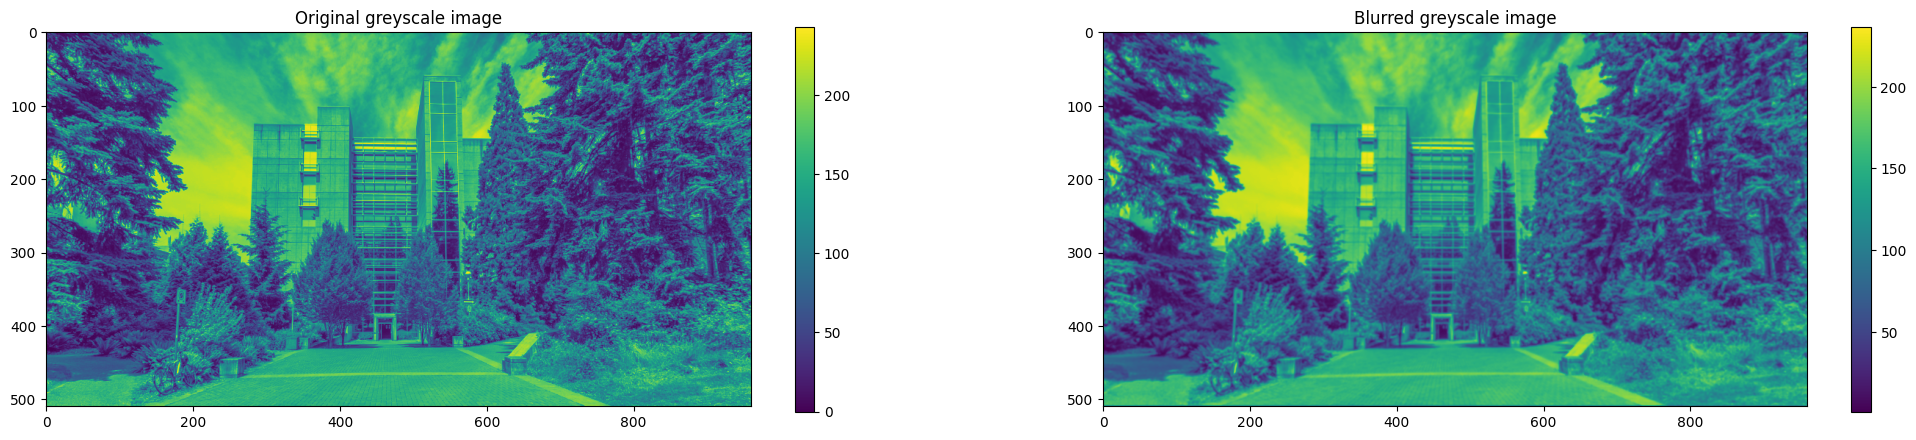

In [ ]:
def apply_convolutional_filter(image, kernel):
    # ~~~~~~~START TODO~~~~~~~~~
    # (5 points): Create a function to apply a kernel to an image using convolution.
    # You may NOT use the np.convolve or np.pad functions.
    # The input image must be zero padded so that
    # the output image shape should be the same as the input.

    # Image dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Padding dimensions
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Zero padding
    padded_image = np.zeros((image_height + 2*pad_height, image_width + 2*pad_width))
    padded_image[pad_height:pad_height+image_height, pad_width:pad_width+image_width] = image

    # Output image
    output = np.zeros_like(image)

    # Convolution operation
    for x in range(image_height):
        for y in range(image_width):
            output[x, y] = np.sum(kernel * padded_image[x:x+kernel_height, y:y+kernel_width])

    return output
  # ~~~~~~~~END TODO~~~~~~~~~~

def gaussian(size,sigma):
  # ~~~~~~~START TODO~~~~~~~~~
  # (5 points): Create a function which returns an appropriate gaussian filter
  # Ensure the output of your kernel has a sum of 1
  # The formula should be of the form G(x,y) = exp(-(x^2+y^2)/(2*sigma^2))/(2*pi*sigma^2)

  ax = np.arange(-size // 2 + 1., size // 2 + 1.)
  xx, yy = np.meshgrid(ax, ax)

  kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
  kernel = kernel / np.sum(kernel)

  return kernel
  # ~~~~~~~~END TODO~~~~~~~~~~


# ~~~~~~~START TODO~~~~~~~~~
# (3 points): Read the image at './uvic_1.jpg' and convert it to greyscale.
# You do not need to convert the image to greyscale manually.
# Re-scale the image down by a factor of 1/2.
# Then convert the image to a float.
# Finally create gaussian filters with size 3 and sigma 2 and size 3 and sigma 1.
# Print these gaussian filters.

# Reading and processing the image
img = cv2.imread('./uvic_1.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  # Rescaling by factor of 1/2
img = img.astype(np.float32)  # Converting to float

# Gaussian filters
gaussian_filter_sigma_2 = gaussian(3, 2)
gaussian_filter_sigma_1 = gaussian(3, 1)

print("Gaussian filter with size 3 and sigma 2:\n", gaussian_filter_sigma_2)
print("Gaussian filter with size 3 and sigma 1:\n", gaussian_filter_sigma_1)

# ~~~~~~~~END TODO~~~~~~~~~~


# ~~~~~~~START TODO~~~~~~~~~
# (2 points): Apply a gaussian kernel to your
# down-scalled normalized image.
# Use a kernel size of 5 and a sigma of 1.
# Print your kernel and it's sum as well as the input and output image sizes.

# Gaussian kernel application
kernel_size = 5
sigma = 1
gaussian_kernel = gaussian(kernel_size, sigma)

# Apply the kernel
blurred = apply_convolutional_filter(img, gaussian_kernel)

print("Kernel:\n", gaussian_kernel)
print("Kernel sum: ", np.sum(gaussian_kernel))
print("Input image size: ", img.shape)
print("Output image size: ", blurred.shape)

# ~~~~~~~~END TODO~~~~~~~~~~


plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(img,title="Original greyscale image", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(blurred,title = "Blurred greyscale image", ori='vertical')



Image Gradients

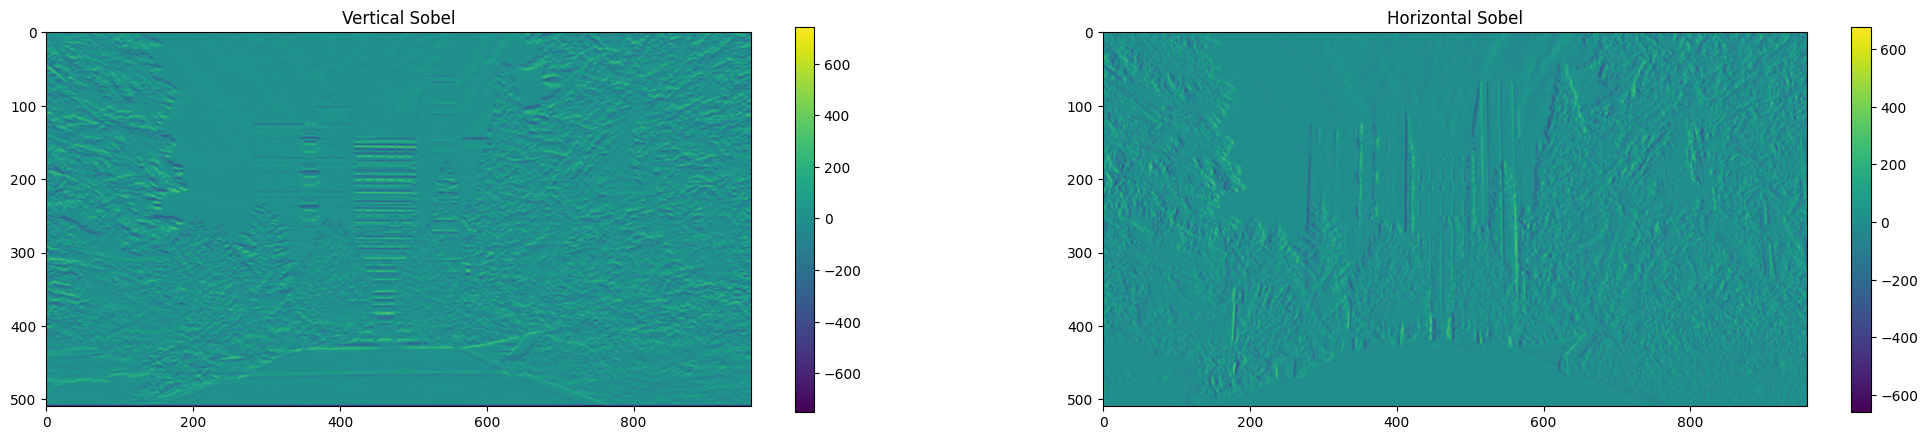

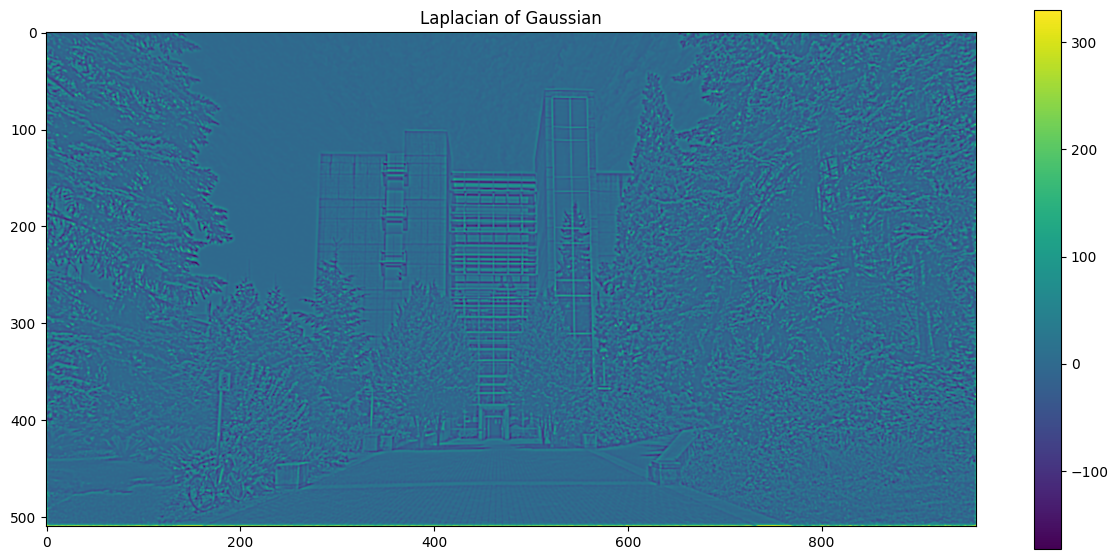

In [ ]:
# ~~~~~~~START TODO~~~~~~~~~
# (3 points): Generate 3x3 Sobel filters for both vertical and horizontal edges.
# Apply these filters to the blurred greyscale image from the previous section.

# Sobel Filters for vertical and horizontal edges

sobel_vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Applying Sobel filters to the blurred image
vertical = apply_convolutional_filter(blurred, sobel_vertical)
horizontal = apply_convolutional_filter(blurred, sobel_horizontal)

# ~~~~~~~~END TODO~~~~~~~~~~

# ~~~~~~~START TODO~~~~~~~~~
# (2 points): Generate a 3x3 Laplacian of Gaussian filter for vertical and horizontal edges.
# Apply this filter to the blurred greyscale image from the previous section.

LOG_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Applying the LoG filter to the blurred image
LOG_image = apply_convolutional_filter(blurred, LOG_kernel)

# ~~~~~~~~END TODO~~~~~~~~~~


plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(vertical,title= "Vertical Sobel", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(horizontal,title = "Horizontal Sobel", ori='vertical')
plt.figure(figsize = (15,7))
plt = pltImg(LOG_image,title="Laplacian of Gaussian", ori='vertical')


Non-Maximal Supression

34575488 10750112


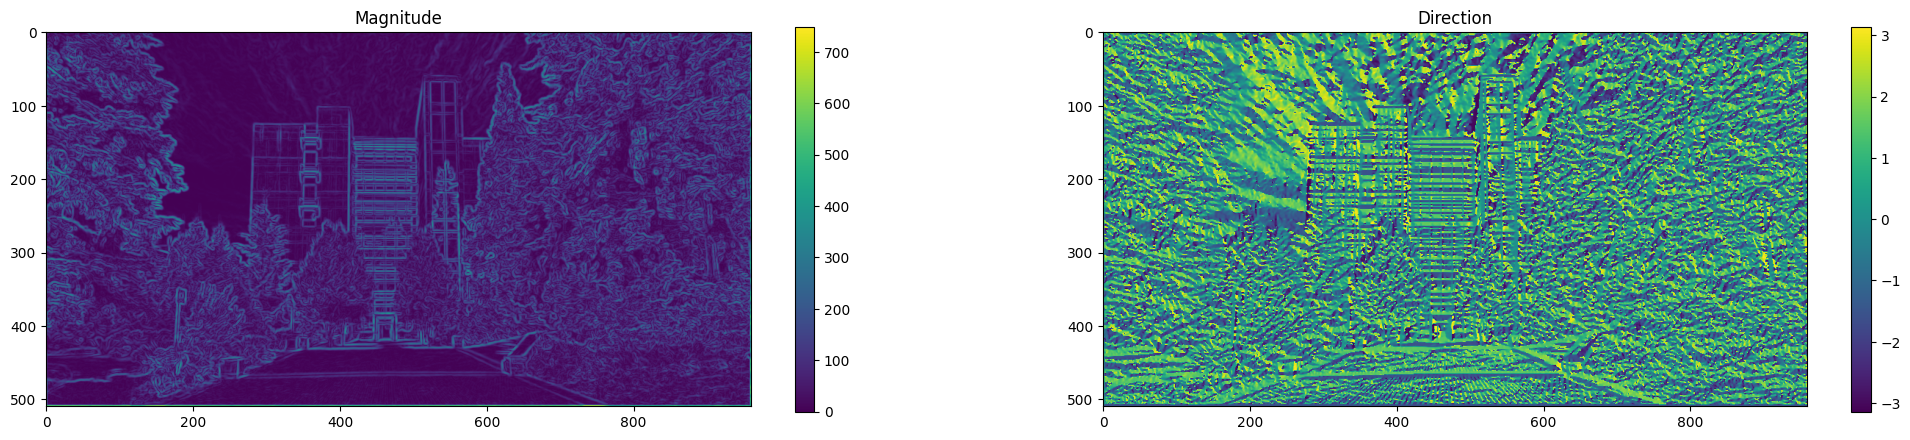

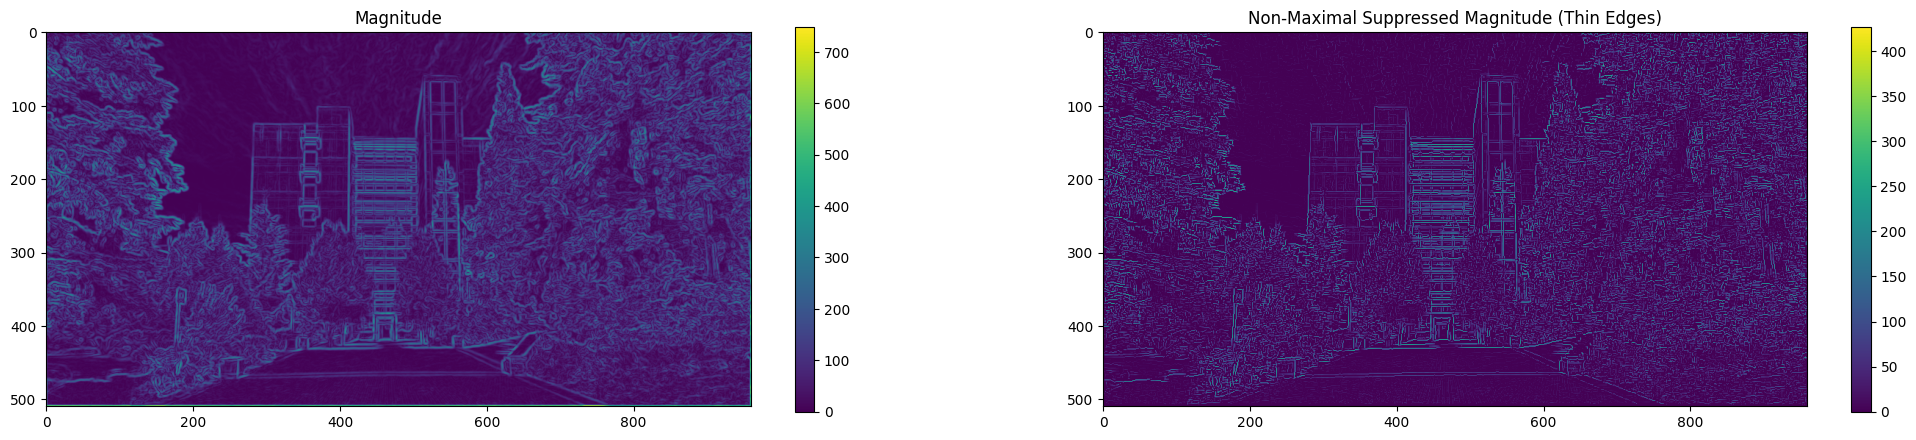

In [ ]:
from numpy.ma.core import zeros_like

def non_maximal_suppression(gradient_magnitudes, gradient_directions):
  # ~~~~~~~START TODO~~~~~~~~~
  # (11 points): In this function you will generate a filtered gradient magnitude map.
  # All gradients which are non-maximal along the gradient direction
  # (normal to the edge) should be set to zero in the output gradient magnitude.
  # The output should be the same size as the input, you can ignore gradients
  # at the edge of the image and leave them unchanged.

  M, N = gradient_magnitudes.shape
  output = np.zeros_like(gradient_magnitudes)
  angle = gradient_directions * 180. / np.pi
  angle[angle < 0] += 180

  for i in range(1, M-1):
        for j in range(1, N-1):
            try:
                q = 255
                r = 255

               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = gradient_magnitudes[i, j+1]
                    r = gradient_magnitudes[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = gradient_magnitudes[i+1, j-1]
                    r = gradient_magnitudes[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = gradient_magnitudes[i+1, j]
                    r = gradient_magnitudes[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = gradient_magnitudes[i-1, j-1]
                    r = gradient_magnitudes[i+1, j+1]

                if (gradient_magnitudes[i,j] >= q) and (gradient_magnitudes[i,j] >= r):
                    output[i,j] = gradient_magnitudes[i,j]
                else:
                    output[i,j] = 0

            except IndexError as e:
                pass

  return output

  # ~~~~~~~~END TODO~~~~~~~~~~

# ~~~~~~~START TODO~~~~~~~~~
# (2 points): Use the horizontal and vertical gradients to generate the
# gradient magnitudes and directions.

magnitudes = np.sqrt(vertical**2 + horizontal**2)
directions = np.arctan2(vertical, horizontal)


# ~~~~~~~~END TODO~~~~~~~~~~


suppressed_magnitudes = non_maximal_suppression(magnitudes.copy(), directions.copy())
print(int(np.sum(magnitudes)), int(np.sum(suppressed_magnitudes)))

plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(magnitudes,title= "Magnitude", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(directions,title = "Direction", ori='vertical')

plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(magnitudes,title= "Magnitude", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(suppressed_magnitudes,title = "Non-Maximal Suppressed Magnitude (Thin Edges)", ori='vertical')

Hysteresis Threasholding

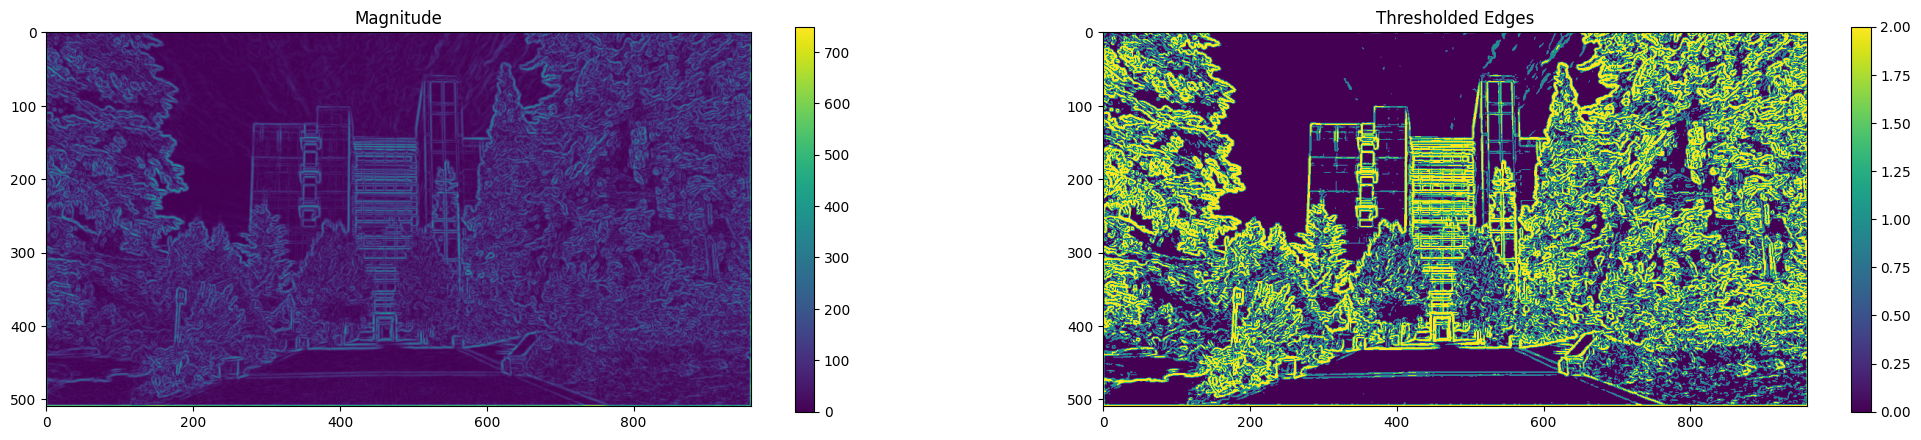

In [ ]:
def threasholding(magnitudes, low_threash, high_thresh):
  # ~~~~~~~START TODO~~~~~~~~~
  # (2 points): Threshold the magnitude images into a tertiary image
  # where 0 is no edge, 1 is possible edge and 2 is definite edge based on the
  # passed threasholds.

  M, N = magnitudes.shape
  output = np.zeros((M,N), dtype=np.int32)

  # thresholds
  strong = 2
  weak = 1

  # Apply thresholds
  strong_i, strong_j = np.where(magnitudes >= high_thresh)
  zeros_i, zeros_j = np.where(magnitudes < low_threash)

  weak_i, weak_j = np.where((magnitudes >= low_threash) & (magnitudes < high_thresh))

  output[strong_i, strong_j] = strong
  output[weak_i, weak_j] = weak

  return output
  # ~~~~~~~~END TODO~~~~~~~~~~

threasholded_edges = threasholding(magnitudes.copy(), 50,100)

plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(magnitudes,title= "Magnitude", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(threasholded_edges, title = "Thresholded Edges", ori='vertical')


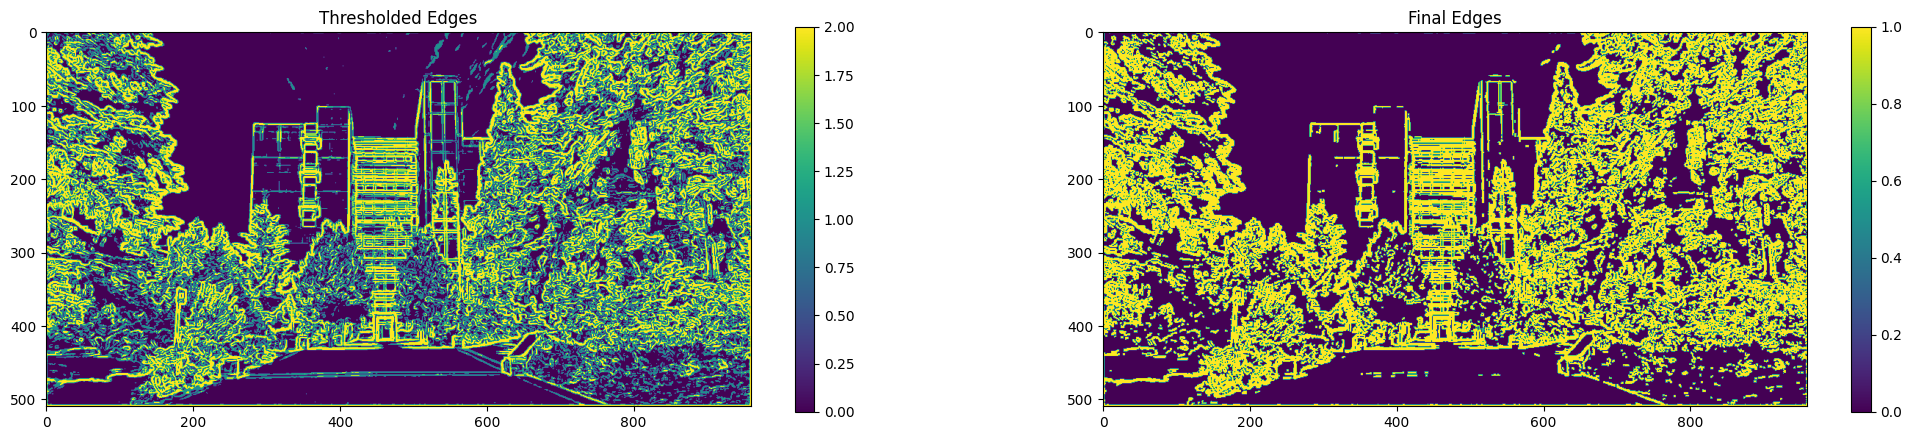

In [ ]:
def hysteresis(edges):
  # ~~~~~~~START TODO~~~~~~~~~
  # (5 points): Create binary image of edges.
  # Ensure any weak edge which connects to a strong edge is returned as a strong edge.
  # The input is your ternary image from the previous block.
  # A recursive helper function may be useful here!

  M, N = edges.shape
    # Define strong and weak values
  strong = 2
  weak = 1

  # Output image initialized to all zeros
  output = np.zeros((M,N), dtype=np.uint8)

  # Check for weak edges adjacent to strong edges and convert them to strong
  def check_neighbors(i, j):
        if edges[i, j] == weak:
            # Check all eight neighbors for a strong edge
            for x in range(max(i-1, 0), min(i+2, M)):
                for y in range(max(j-1, 0), min(j+2, N)):
                    if edges[x, y] == strong:
                        return strong
            return 0
        return edges[i, j]

  for i in range(M):
        for j in range(N):
            output[i, j] = check_neighbors(i, j)

  # Convert all strong edges to 1 for the final binary image
  output[output == strong] = 1
  return output

  # ~~~~~~~~END TODO~~~~~~~~~~

final_edges = hysteresis(threasholded_edges.copy())

plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(threasholded_edges,title= "Thresholded Edges", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(final_edges,title = "Final Edges", ori='vertical')



# **3. Keypoint Extraction using FAST!**

# Use this article for details on the fast algorithm
https://docs.opencv.org/3.4/df/d0c/tutorial_py_fast.html
We will only be implementing FAST Feature Detection only, not the Machine Learning a Corner Detector or the Non-Maximal Supression.

2855


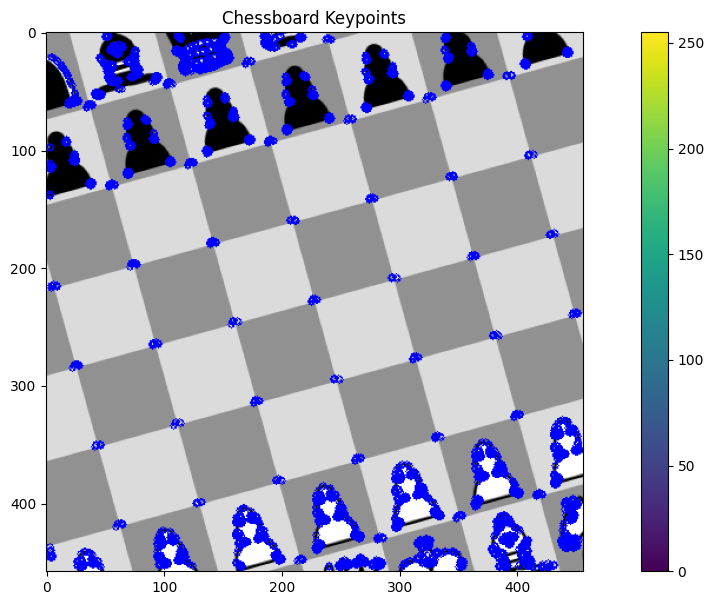

In [ ]:
def fast_keypoint(image, theashold, n):
  # ~~~~~~~START TODO~~~~~~~~~
  # (5 points): create a list of points in the image which are
  # FAST keypoints in the image based on the FAST keypoint criteria.
  # You can ignore the edges of the image where the test would
  # require access outside of the image size.
  # The output keypoints should be a list of points like:
  # [(y_1,x_1),(y_2,x_2),....]

    keypoints = []
    rows, cols = image.shape

    # Define the circle of 16 pixels around the center pixel
    circle_offsets = [(-3, 0), (-3, 1), (-2, 2), (-1, 3), (0, 3), (1, 3), (2, 2), (3, 1),
                      (3, 0), (3, -1), (2, -2), (1, -3), (0, -3), (-1, -3), (-2, -2), (-3, -1)]

    for y in range(3, rows-3):
        for x in range(3, cols-3):
            p = image[y, x]
            circle_pixels = [image[y+dy, x+dx] for dy, dx in circle_offsets]

            # Check if n contiguous pixels are all brighter than Ip+t or all darker than Ip-t
            brighter = 0
            darker = 0
            for val in circle_pixels:
                if val > p + theashold:
                    brighter += 1
                    darker = 0  # Reset for contiguous count
                elif val < p - theashold:
                    darker += 1
                    brighter = 0  # Reset for contiguous count
                else:
                    # Reset counts if the sequence breaks
                    brighter = 0
                    darker = 0

                # If either brighter or darker count reaches n, mark as a keypoint
                if brighter >= n or darker >= n:
                    keypoints.append((x, y))
                    break

  # ~~~~~~~~END TODO~~~~~~~~~~
    return keypoints

img = cv2.imread('6hNwn00.png', cv2.IMREAD_GRAYSCALE)
kps = fast_keypoint(img, 10, 9)
print(len(kps))
img_RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for kp in kps:
  cv2.circle(img_RGB, kp, 3, [0,0,255])

plt.figure(figsize = (15,7))
plt = pltImg(img_RGB,title="Chessboard Keypoints", ori='vertical')


-164.0


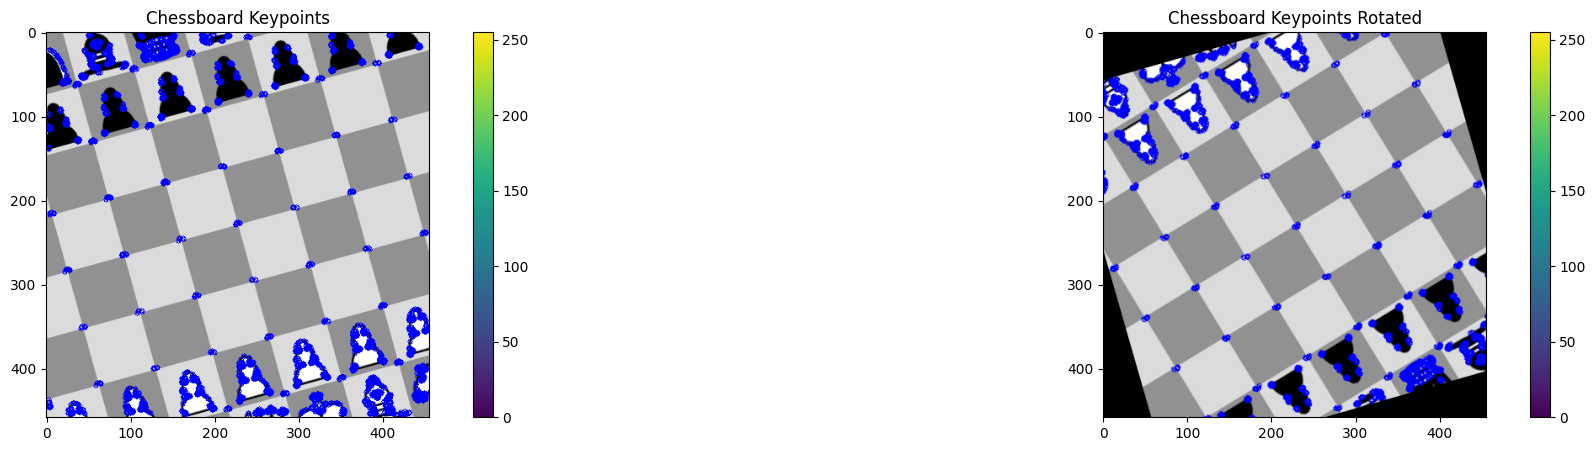

In [ ]:

def fix_chessboard_rotation(kps):
  # ~~~~~~~START TODO~~~~~~~~~
  # (10 points): Using the keypoints you previously generated
  # create a function to compensate the rotation of this chessboard
  # so edges are parallel with the edges of the image.
  # Return the rotation angle required to compensate the rotation of the chessboard.
  # We will accept any rotation that is off by some multiple of 90 degrees, for
  # example if it is upside down.
  # The returned rotation angle should be in degrees.
  # Your solution should be general for any rotation of this chessboard image.
  # It does not need to handle any translations or rotations on non-centerpoints.

  # Calculate differences between all pairs of keypoints to find predominant direction
    angles = []
    for i, (x1, y1) in enumerate(kps):
        for x2, y2 in kps[i+1:]:
            angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
            angles.append(angle)

    # Normalize angles to [0, 180) range
    angles = np.mod(angles, 180)

    # Find the most common angle, assuming it corresponds to the orientation of the chessboard lines
    hist, bins = np.histogram(angles, bins=180, range=(0, 180))
    predominant_angle = bins[np.argmax(hist)]

    # Calculate rotation needed to align this angle horizontally
    # Chessboard lines should be close to 0, 45, 90, or 135 degrees
    if 45 < predominant_angle <= 135:
        rotation_angle = 90 - predominant_angle
    else:
        rotation_angle = -predominant_angle


  # ~~~~~~~~END TODO~~~~~~~~~~
    return rotation_angle


(h, w) = img_RGB.shape[:2]
(cX, cY) = (w // 2, h // 2)
angle = fix_chessboard_rotation(kps)
print(angle)
M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
rotated = cv2.warpAffine(img_RGB, M, (w, h))

plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
plt = pltImg(img_RGB,title= "Chessboard Keypoints", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(rotated,title = "Chessboard Keypoints Rotated", ori='vertical')

**End of the assignment!**